<a href="https://colab.research.google.com/github/Sunidhiwillow/IrisClassificationStreamlitsharing/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df = pd.read_csv("IRIS.csv")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.shape

(150, 5)

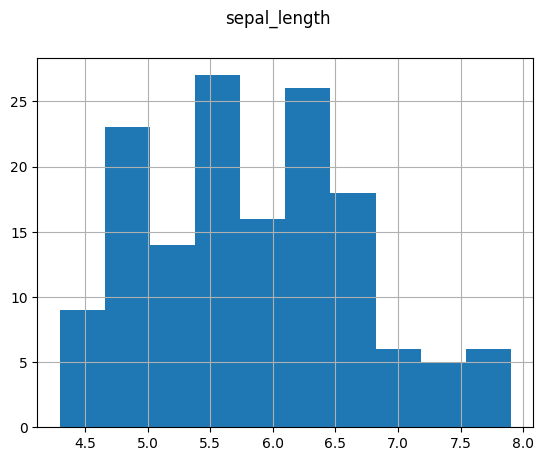

In [9]:
hist1 = "sepal_length"
df[hist1].hist()
plt.suptitle(hist1)
plt.show()

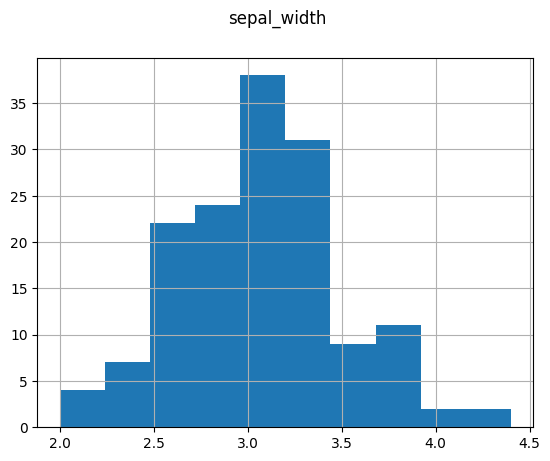

In [10]:
hist2 = "sepal_width"
df[hist2].hist()
plt.suptitle(hist2)
plt.show()

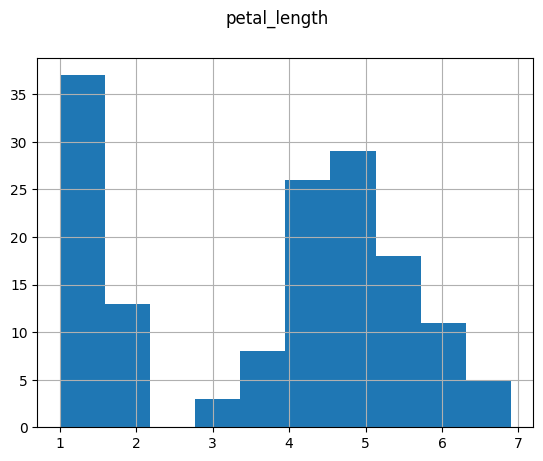

In [11]:
hist3 = "petal_length"
df[hist3].hist()
plt.suptitle(hist3)
plt.show()

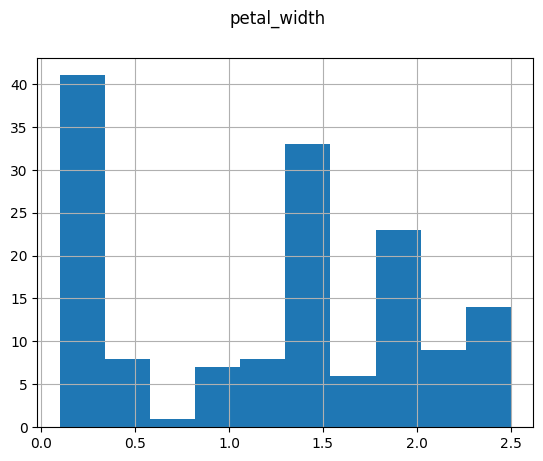

In [12]:
hist4 = "petal_width"
df[hist4].hist()
plt.suptitle(hist4)
plt.show()

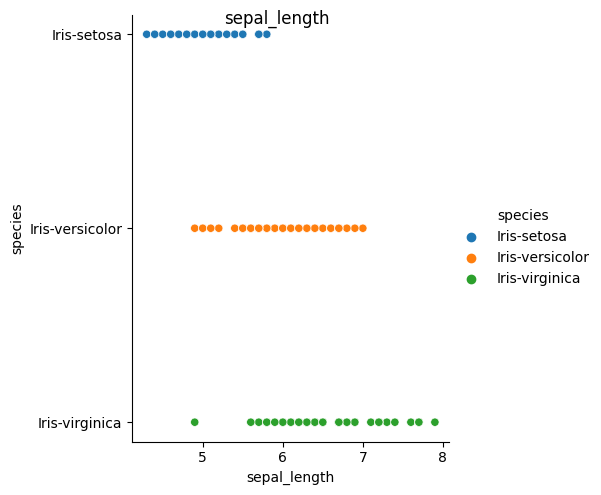

In [13]:
col1 = "sepal_length"
sns.relplot(x=col1, y="species", hue ="species", data=df )
plt.suptitle(col1)
plt.show()


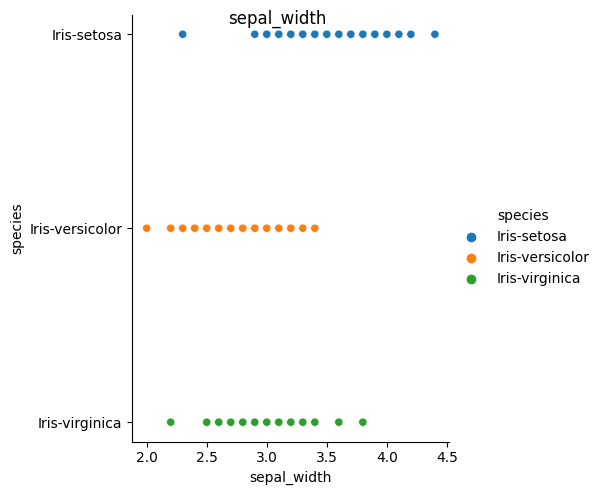

In [14]:
col2 = "sepal_width"
sns.relplot(x=col2, y="species", hue ="species", data=df )
plt.suptitle(col2)
plt.show()

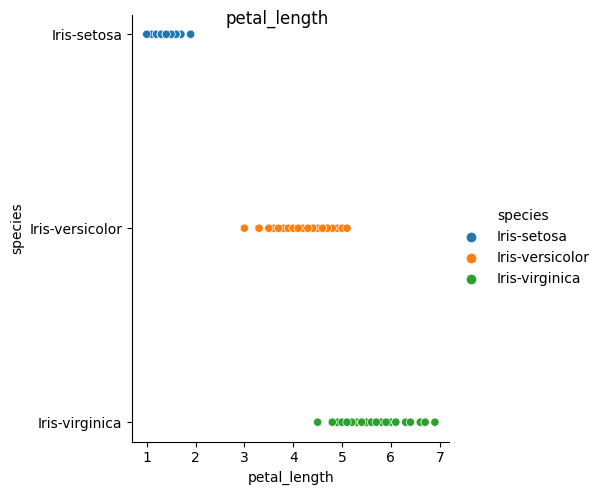

In [15]:
col3 = "petal_length"
sns.relplot(x=col3, y="species", hue ="species", data=df )
plt.suptitle(col3)
plt.show()

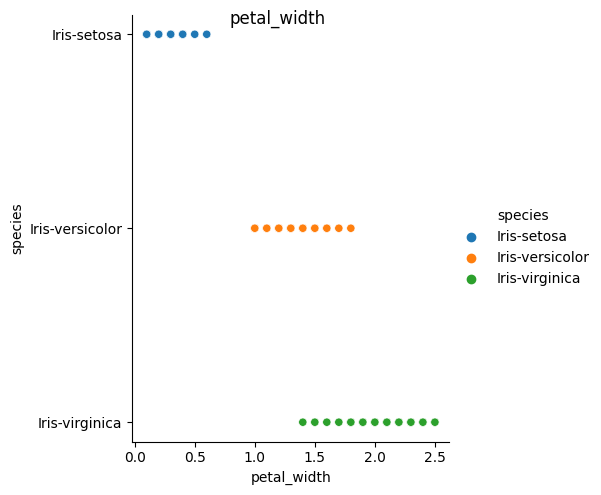

In [16]:
col4 = "petal_width"
sns.relplot(x=col4, y="species", hue ="species", data=df )
plt.suptitle(col4)
plt.show()

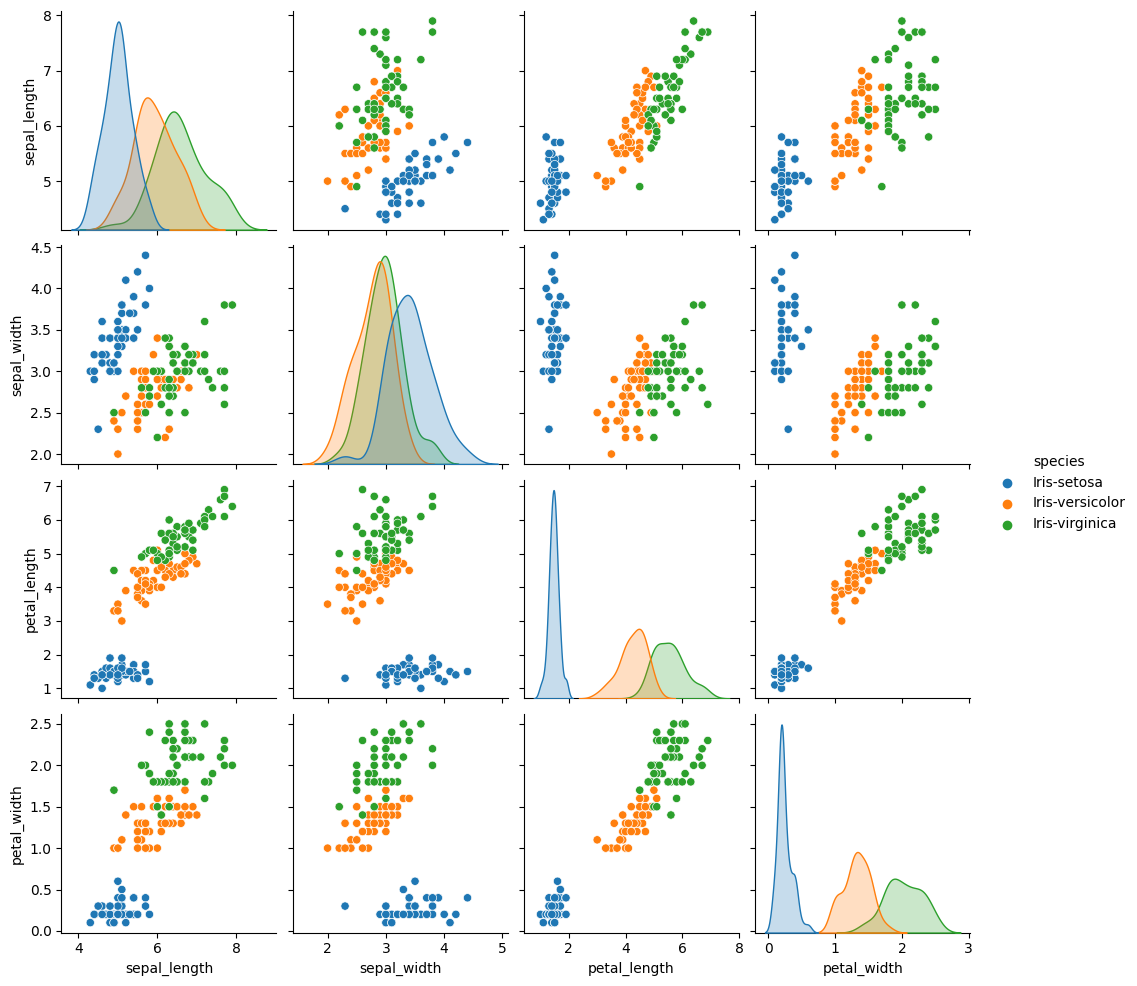

In [17]:
sns.pairplot(df, hue = "species")

In [18]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
df['species'].unique()

array([0, 1, 2])

In [20]:
df_train, df_test = train_test_split(df,test_size=0.25)

In [21]:
X_train = df_train.drop(columns=['species']).values
Y_train = df_train['species'].values

In [22]:
X_test = df_test.drop(columns=['species']).values
Y_test = df_test['species'].values

In [23]:
X_test.shape

(38, 4)

In [24]:
df['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [25]:
######### MANUAL MODELLING BASED ON PAIRPLOTS USING PETAL_LENGTH
def single_feature_prediction(petal_length):
  if petal_length < 2.7:
    return 0
  elif petal_length< 4.5:
    return 1
  else:
    return 2

In [26]:
manual_prediction = [single_feature_prediction(val) for val in X_train[:,3]]

In [ ]:
manual_prediction == Y_train

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True, False,  True, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False,  True,
        True,  True, False, False,  True, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
        True, False,  True,  True, False,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False,  True, False,  True])

In [27]:
model1 = LogisticRegression(max_iter = 1000)
model1.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [28]:
prediction = model1.predict(X_test)
print('Accuracy:', accuracy_score(prediction,Y_test))

Accuracy: 0.9736842105263158


In [29]:
confusion_mat = confusion_matrix(Y_test, prediction)
print("Confusion_matrix:\n",confusion_mat)
print(classification_report(Y_test, prediction))

Confusion_matrix:
 [[17  0  0]
 [ 0 12  0]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      1.00      0.96        12
           2       1.00      0.89      0.94         9

    accuracy                           0.97        38
   macro avg       0.97      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38



In [30]:
#####USING KNN CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors = 5)
model2.fit(X_train,Y_train)
prediction2 = model2.predict(X_test)
#print(prediction2)
print("Accuracy_score: ", accuracy_score(prediction2,Y_test))

Accuracy_score:  0.9736842105263158


In [31]:
##### DECISION TREES
from sklearn import tree
model3 = tree.DecisionTreeClassifier()
model3.fit(X_train,Y_train)
prediction3 = model3.predict(X_test)
print("Accuracy_score: ", accuracy_score(prediction3, Y_test))

Accuracy_score:  0.9736842105263158


In [32]:
pickle.dump(model1,open('model_logisticreg.pkl','wb'))
pickle.dump(model2,open('model_KNN.pkl','wb'))
pickle.dump(model3,open('model_decisiontree.pkl','wb'))

In [33]:
#sepal_length = float(input("enter sepal_length(cm): "))
#sepal_width = float(input("enter sepal_width(cm): "))
#petal_length = float(input("enter petal_length(cm): "))
#petal_width = float(input("enter petal_width(cm): "))
#input = np.array([[sepal_length, sepal_width,petal_length,petal_width]])
#predicted_species = model3.predict(input)
#print("Predicted_species: ", predicted_species[0])

In [34]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 119.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 33.6 MB/s eta 0:00:00
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzlocal-5.0.1:
      Successfully uninstalled tzlocal-5.0.1


In [35]:
import streamlit as st
import pickle
import numpy as np

In [36]:
logisticreg_model = pickle.load(open('model_logisticreg.pkl','rb'))
KNN_model = pickle.load(open('model_KNN.pkl','rb'))
DecisionTree_model = pickle.load(open('model_decisiontree.pkl','rb'))

In [37]:
def classify(num):
  if num < 0.5:
    return 'sentosa'
  elif num< 1.5:
    return 'versicolor'
  else:
    return 'verginica'

In [38]:
%%writefile app.py


st.title("StreamlitDeployment")
html_temp = """
<div_style ="background-color:teal ;padding:10px">
<h2 style ="color:white text-align:centre;">Iris Classification</h2>
</div>
"""
st.markdown(html_temp,unsafe_allow_html = True)
activities = ['logistic Regression', 'KNN', 'DecisionTree']
option = st.sidebar.selectbox("Which model would you like to use?", activities)
st.subheader(option)
st.spinner("Hello")
sepal_length = st.slider('Select sepal length', 0.0,10.0)
sepal_width = st.slider('Select sepal width', 0.0,10.0)
petal_length = st.slider('Select petal length', 0.0,10.0)
petal_width = st.slider('Select petal width', 0.0,10.0)
input = np.array([[sepal_length, sepal_width,petal_length,petal_width]])
if st.button('Classify'):
  if option=='logistic Regression':
    st.success(classify((model1.predict(input))))
  elif option =='KNN':
    st.success(classify((model2.predict(input))))
  else:
    st.success(classify((model3.predict(input))))

Writing app.py


In [39]:
#!pip install pyngrok

In [40]:
#from pyngrok import ngrok

In [41]:
#!ngrok authtoken 2U1jORfsNw52SZNM9n08bdRo9zt_5td1WXbqGbFSw4FzuU86v

In [42]:
#from pyngrok import ngrok
#url = ngrok.connect(port=8501)
#url

In [43]:
#!nohup streamlit run app.py &

In [44]:
#from pyngrok import ngrok
#url = ngrok.connect(port=8501)
#url

In [52]:
import sys
print(sys.modules.keys())

dict_keys(['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', '_io', 'marshal', 'posix', '_frozen_importlib_external', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', '_abc', 'abc', 'io', '__main__', 'types', 'enum', '_sre', 'sre_constants', 'sre_parse', 'sre_compile', '_collections_abc', 'itertools', 'keyword', '_operator', 'operator', 'reprlib', '_collections', 'collections', '_functools', 'functools', '_locale', 'copyreg', 're', 'warnings', '_stat', 'stat', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', '_distutils_hack', 'importlib._bootstrap', 'importlib._bootstrap_external', 'importlib', 'importlib._abc', 'contextlib', 'importlib.util', 'importlib.machinery', 'google', 'google.cloud', 'google.logging', 'google.iam', 'mpl_toolkits', 'sphinxcontrib', 'sitecustomize', 'site', 'runpy', 'ipykernel._version', '_json', 'json.scanner', 'json.decoder', 'json.encoder', 'json', 'errno',

In [53]:
!pip install pipreqs

  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=22531513ffaa0d36dced016e6df02591c272436ec65f5a10923cd26511c9c194
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [60]:
!pipreqs

INFO: Successfully saved requirements file in /content/requirements.txt
